In [1]:
get_ipython().system(' pip install PyGithub')
get_ipython().run_line_magic('matplotlib', 'notebook')

In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
from config import git_key

In [62]:
def corona_df(git_key, branch):
    from github import Github
    import requests
    import io
    # First create a Github instance  using username and password
    # g = Github("user", "password")
    # # or using an access token
    g = Github(git_key)
    repo = g.get_repo("CSSEGISandData/COVID-19")
    # URL for GET requests to retrieve coronavirus data
    contents = repo.get_contents(branch)
    df = pd.read_csv(io.StringIO(contents.decoded_content.decode('utf-8')))
    return df

In [63]:
# Pull "APIs" using defined formula above
confirmed_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [64]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,830,860,889,910,934,950,962,973,982,986
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,337,342,352,366,372,375,380,381,387,393
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,486,505,518,529,537,544,551,553,555,560
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,261,267,272,279,281,285,287,290,292,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,83,86,87,90,90,90,90,91,91,91


In [65]:
#Define function for cleaning the data
def clean_df(df):
    
    df = df.fillna(value=0)                                          # Fill NaN with zero values
    df = df.drop(columns=[ "Lat", "Long"])                           # Drop "Lat" "Long" for raw number data
    df = df.groupby(['Country/Region'], as_index=False).agg('sum')   # Create groupby object for sorting by country/region and aggregate
    df = df.set_index(["Country/Region"])                            # Define new index
    df = df.astype(int)                                              # Set all values as integers
    df = df.sort_values(by=df.columns[-1], ascending=False)          # Sort by highest value of most recent recorded date

    return df

In [66]:
# Initiate new formula for all data sets and assign to variables
df_deaths_clean = clean_df(deaths_df)
df_confirmed_clean = clean_df(confirmed_df)
df_recovered_clean = clean_df(recovered_df)

In [67]:
row_confirmed = list(df_confirmed_clean[1:-1].agg("sum"))
row_deaths = list(df_deaths_clean[1:-1].agg("sum"))
row_recovered = list(df_recovered_clean[1:-1].agg("sum"))

dates = df_deaths_clean.columns

In [68]:
# Define function to plot each line on a fig
def myplot(ax, x_axis, country, df):
    import random
    marker = ["o","1","2","3","4","s","p","h","x","+", "d"]
    ax.plot(x_axis, df.iloc[country,:], marker=random.choice(marker), linestyle="--", label=df.index[country])

# Define function to plot full plot with top 10 lines in a given df
def myplot_full(fig, ax, df, title):
    myplot(ax, df.columns, 1, df)
    myplot(ax, df.columns, 2, df)
    myplot(ax, df.columns, 3, df)
    myplot(ax, df.columns, 4, df)
    myplot(ax, df.columns, 5, df)
    myplot(ax, df.columns, 6, df)
    myplot(ax, df.columns, 7, df)
    myplot(ax, df.columns, 8, df)
    myplot(ax, df.columns, 9, df)
    myplot(ax, df.columns, 10, df)

    ax.set(xlabel="Days (MM/DD/YY)", ylabel="People", title=title)

    plt.xticks(df.columns, df.columns, rotation=90);
    ax.grid();
    ax.legend();

# Define fig saving function
def fig_save(fig, file_name):
    import os
    path = os.path.join("images", file_name)
    fig.savefig(path)

<IPython.core.display.Javascript object>


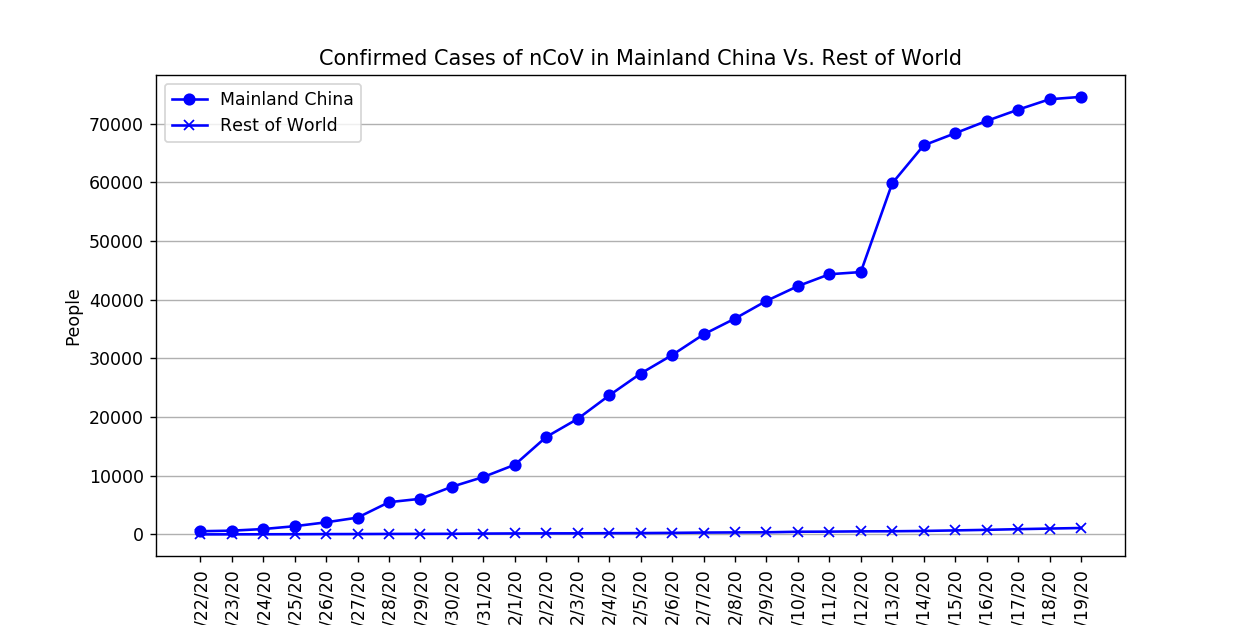

In [69]:
# MLC Confirmed vs. ROW Confirmed
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dates, df_confirmed_clean.loc["Mainland China",:], label="Mainland China", marker="o", color='b')
ax.plot(dates, row_confirmed, label="Rest of World", marker="x", color='b')
ax.set_xticklabels(dates, rotation=90);
ax.set(xlabel="Dates", ylabel="People", title="Confirmed Cases of nCoV in Mainland China Vs. Rest of World")
ax.legend();
ax.grid(axis="y");

fig_save(fig, "confirmed_MLCvsROW")

<IPython.core.display.Javascript object>


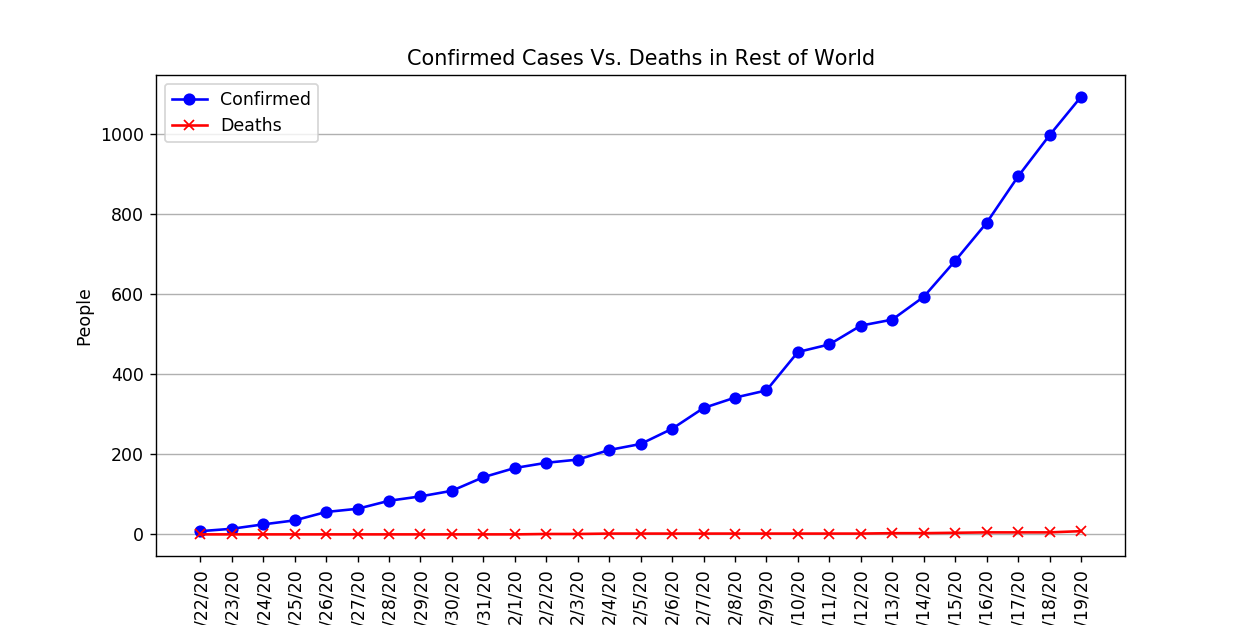

In [70]:
# ROW Confirmed vs. Deaths
fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.plot(dates, row_confirmed, label = "Confirmed", marker="o", color='b')
ax2.plot(dates, row_deaths, label = "Deaths", marker="x", color='r')
ax2.set_xticklabels(dates, rotation=90);
ax2.set(xlabel="Dates", ylabel="People", title="Confirmed Cases Vs. Deaths in Rest of World")
ax2.legend();
ax2.grid(axis="y");

fig_save(fig2, "ROW_confirmed-vs-deaths")

<IPython.core.display.Javascript object>


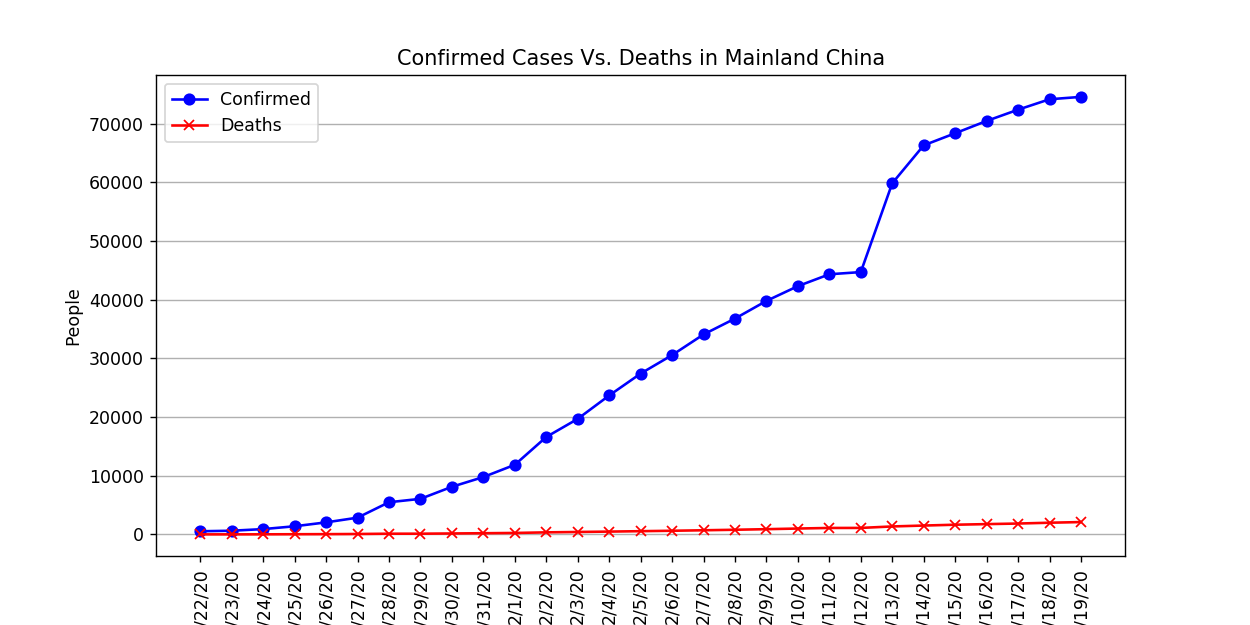

In [74]:
#MLC Confirmed vs. Deaths
fig3, ax3 = plt.subplots(figsize=(10,5))
ax3.plot(dates, df_confirmed_clean.loc["Mainland China",:], label = "Confirmed", marker="o", color='b')
ax3.plot(dates, df_deaths_clean.loc["Mainland China",:], label = "Deaths", marker="x", color='r')
ax3.set_xticklabels(dates, rotation=90);
ax3.set(xlabel="Dates", ylabel="People", title="Confirmed Cases Vs. Deaths in Mainland China")
ax3.legend();
ax3.grid(axis="y");

fig_save(fig3, "MLC_confirmed-vs-deaths")

<IPython.core.display.Javascript object>


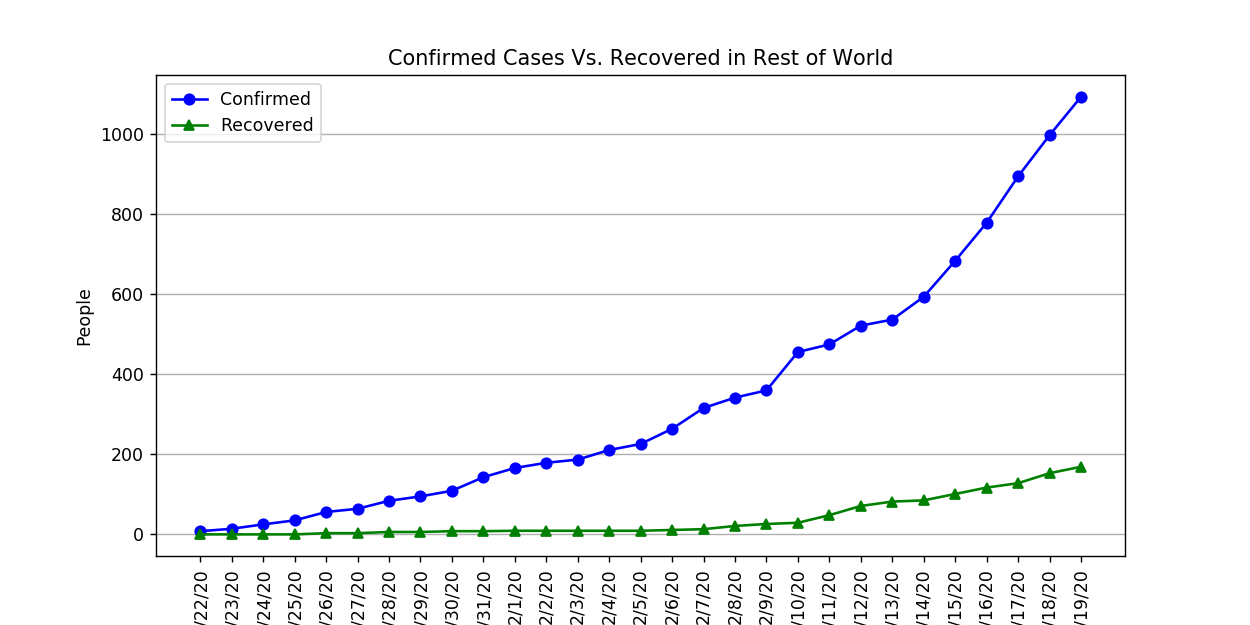

In [75]:
# ROW Confirmed vs. Recovered
fig4, ax4 = plt.subplots(figsize=(10,5))
ax4.plot(dates, row_confirmed, label = "Confirmed", marker="o", color='b')
ax4.plot(dates, row_recovered, label = "Recovered", marker="^", color='g')
ax4.set_xticklabels(dates, rotation=90);
ax4.set(xlabel="Dates", ylabel="People", title="Confirmed Cases Vs. Recovered in Rest of World")
ax4.legend();
ax4.grid(axis="y");

fig_save(fig4, "ROW_confirmed-vs-recovered")

<IPython.core.display.Javascript object>


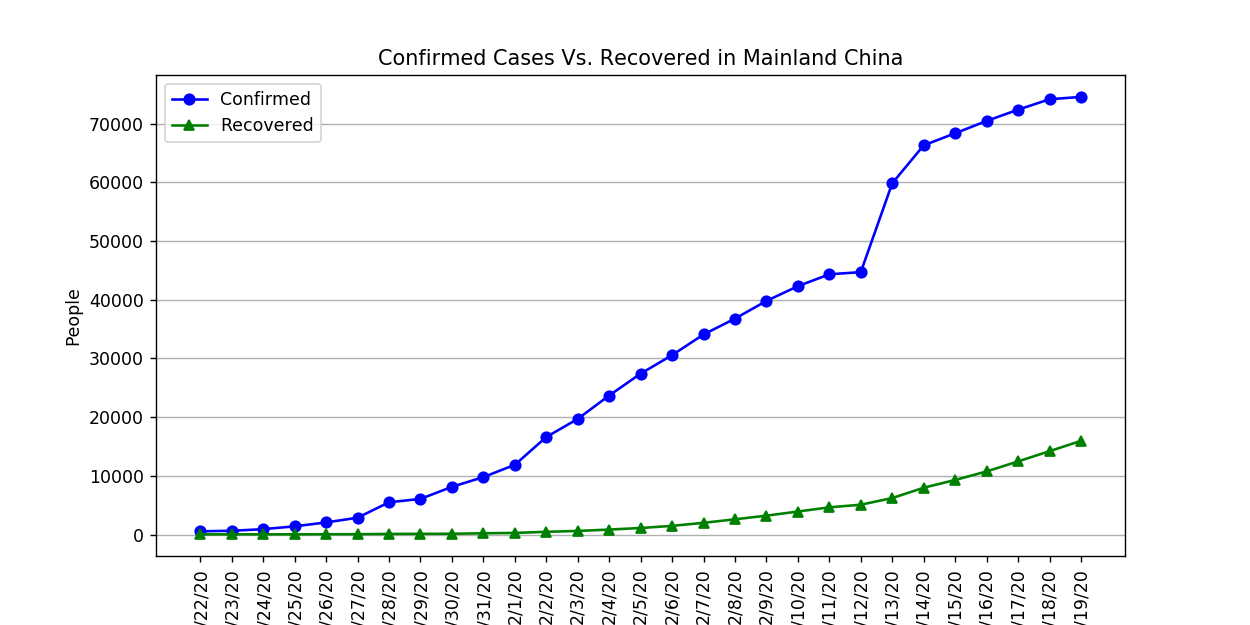

In [73]:
#MLC Confirmed vs. Recovered
fig5, ax5 = plt.subplots(figsize=(10,5))
ax5.plot(dates, df_confirmed_clean.loc["Mainland China",:], label = "Confirmed", marker="o", color='b')
ax5.plot(dates, df_recovered_clean.loc["Mainland China",:], label = "Recovered", marker="^", color='g')
ax5.set_xticklabels(dates, rotation=90);
ax5.set(xlabel="Dates", ylabel="People", title="Confirmed Cases Vs. Recovered in Mainland China")
ax5.legend();
ax5.grid(axis="y");

fig_save(fig5, "MLC_confirmed-vs-recovered")